Bibliotecas usadas

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

o Algoritmo de Bron Kerbosch sem pivotamento e pegando todos os cliques

In [1]:
def bron_kerbosch(R, P, X, G):
    if not P and not X:
        #print(R)
        return
    for v in list(P):
        bron_kerbosch(R.union({v}), P.intersection(G.neighbors(v)), X.intersection(G.neighbors(v)), G)
        P.remove(v)
        X.add(v)

O Algoritmo de Bron Kerbosch sem pivotamento pegando apenas o clique máximo

In [30]:
def bron_kerbosch_clique_maximo(R, P, X, G, max_clique):
    if not P and not X:
        if len(R) > len(max_clique[0]):
            max_clique[0] = R
        return
    for v in list(P):
        bron_kerbosch_clique_maximo(R.union({v}), P.intersection(G.neighbors(v)), X.intersection(G.neighbors(v)), G, max_clique)
        P.remove(v)
        X.add(v)

O algoritmo de Bron com pivo

In [2]:
def bron_kerbosch_com_pivo(R, P, X, G):
    if not P and not X:
        #print(R)
        return
    u = max(P.union(X), key=lambda u: len(P.intersection(G.neighbors(u))))
    for v in P.difference(G.neighbors(u)):
        bron_kerbosch_com_pivo(R.union({v}), P.intersection(G.neighbors(v)), X.intersection(G.neighbors(v)), G)
        P.remove(v)
        X.add(v)

gerando os grafos, intervalo de 10 em 10, a partir de 20, 5 grafos. ou seja, um de 20, 30, 40, 50 e 60

In [32]:
listaGrafos = []
quantVertices = 20
for a in range(0,5):
    listaGrafos.append(nx.fast_gnp_random_graph(quantVertices, 0.8, seed=a))
    quantVertices += 10

funcao que verifica o tempo da **sem o pivo**

In [33]:
import time

def verifica_bron_sem_pivo(G):
    inicio = time.time()

    bron_kerbosch(set(), set(G.nodes()), set(), G)

    fim = time.time()
    duracao = fim - inicio
    return duracao

funçao que verifica o tempo do algoritmo **com o pivo**

In [3]:
def verifica_bron_com_pivo(G):
    inicio = time.time()

    bron_kerbosch_com_pivo(set(), set(G.nodes()), set(), G)

    fim = time.time()
    duracao = fim - inicio
    return duracao

In [35]:
semPivo = {}
for a in range(0,5):
    semPivo[len(listaGrafos[a].nodes)] = verifica_bron_sem_pivo(listaGrafos[a])

In [36]:
comPivo = {}
for a in range(0,5):
    comPivo[len(listaGrafos[a].nodes)] = verifica_bron_com_pivo(listaGrafos[a])

In [37]:
vertices = list(semPivo.keys())
tempos_sem_pivo = list(semPivo.values())
tempos_com_pivo = list(comPivo.values())

In [38]:
import pandas as pd
df = pd.DataFrame({
    'Número de Vértices': vertices,
    'Tempo SEM Pivô': tempos_sem_pivo,
    'Tempo COM Pivô': tempos_com_pivo
})

print(df)

   Número de Vértices  Tempo SEM Pivô  Tempo COM Pivô
0                  20        0.004002        0.001001
1                  30        0.119999        0.005001
2                  40        0.976010        0.036999
3                  50        9.138990        0.187001
4                  60       22.766007        0.645013


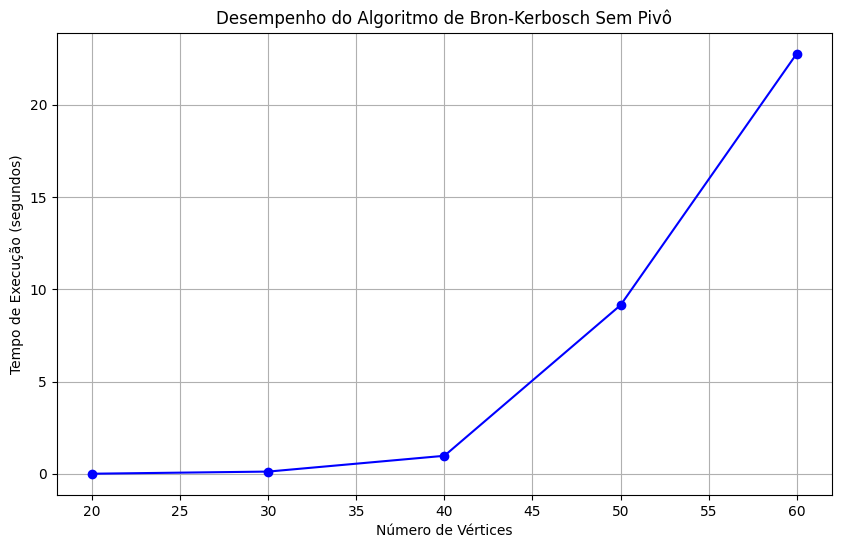

In [39]:
# Criar gráfico para o método sem pivô
plt.figure(figsize=(10, 6))
plt.plot(vertices, tempos_sem_pivo, marker='o', linestyle='-', color='b')
plt.title('Desempenho do Algoritmo de Bron-Kerbosch Sem Pivô')
plt.xlabel('Número de Vértices')
plt.ylabel('Tempo de Execução (segundos)')
plt.grid(True)
plt.show()

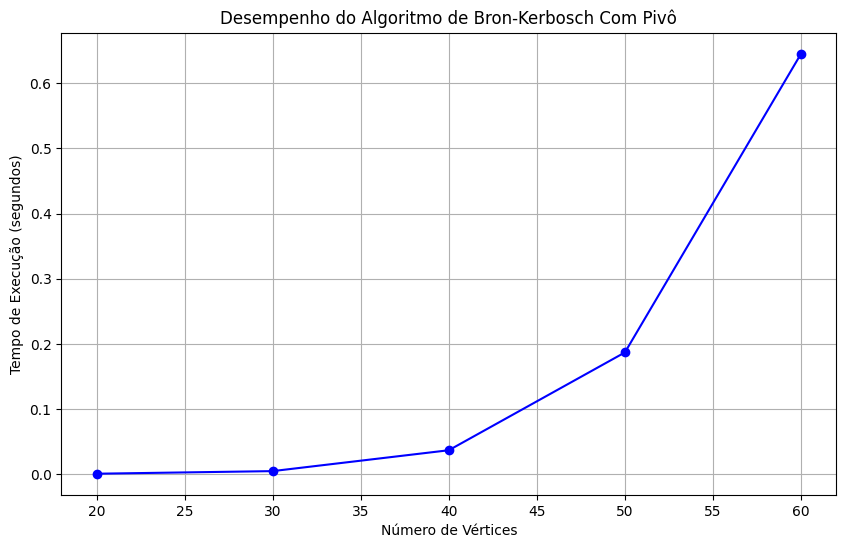

In [40]:
# Criar gráfico para o método com pivô
plt.figure(figsize=(10, 6))
plt.plot(vertices, tempos_com_pivo, marker='o', linestyle='-', color='b')
plt.title('Desempenho do Algoritmo de Bron-Kerbosch Com Pivô')
plt.xlabel('Número de Vértices')
plt.ylabel('Tempo de Execução (segundos)')
plt.grid(True)
plt.show()

Caso queira ver os gráficos:

In [41]:
def mostraGrafos(G):
  plt.figure(figsize=(7, 6))
  nx.draw_circular(G, with_labels=True, node_size=50, node_color='lightblue', edge_color='gray')
  plt.title('Grafo com {} Vértices'.format(len(G.nodes)))
  plt.show()

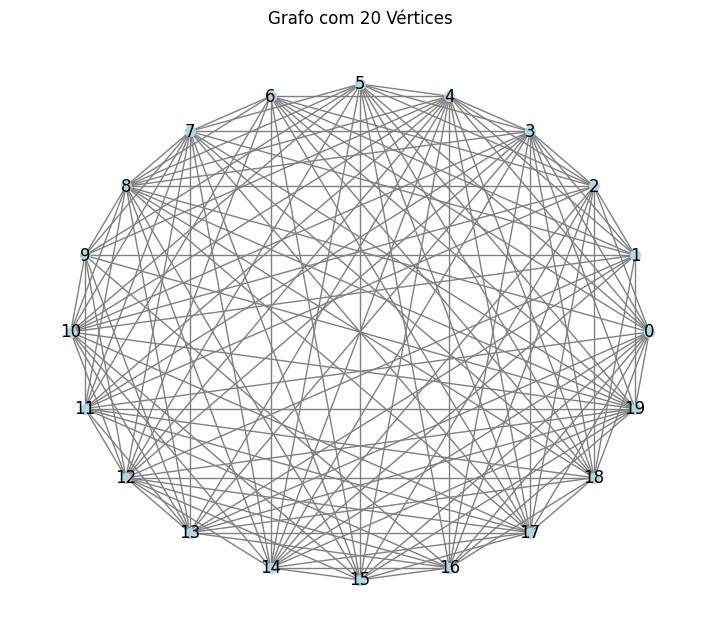

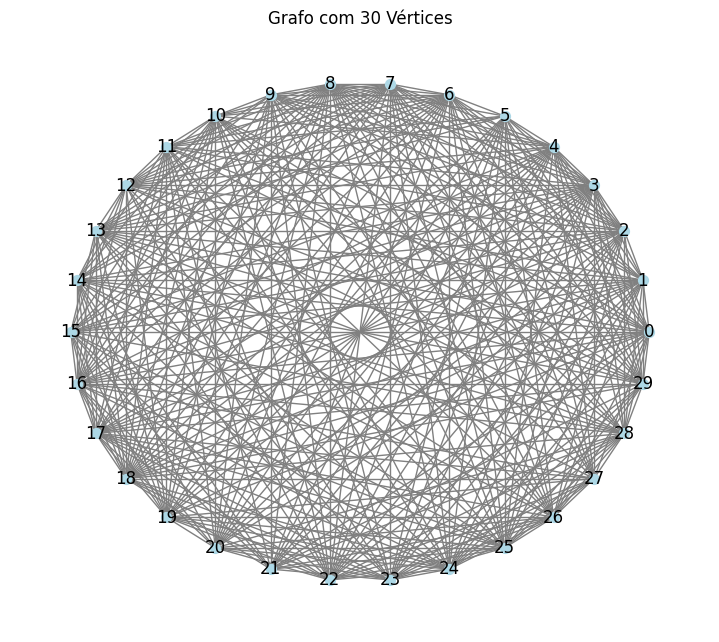

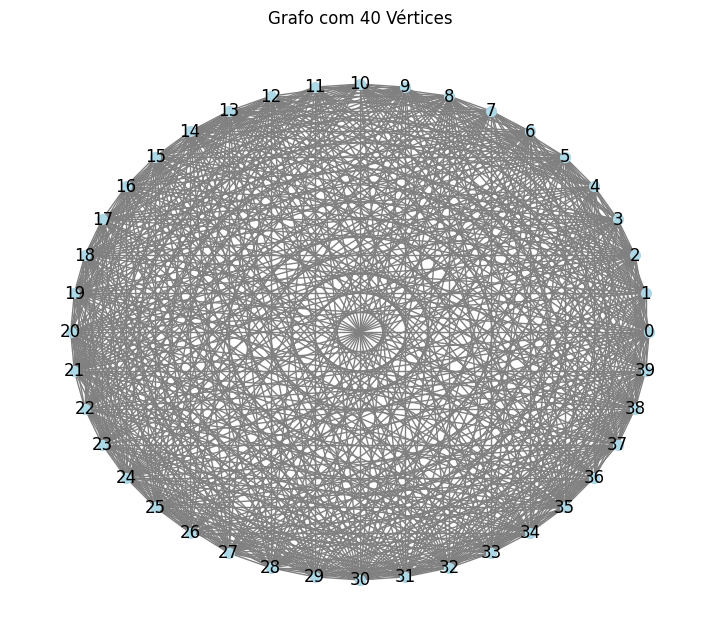

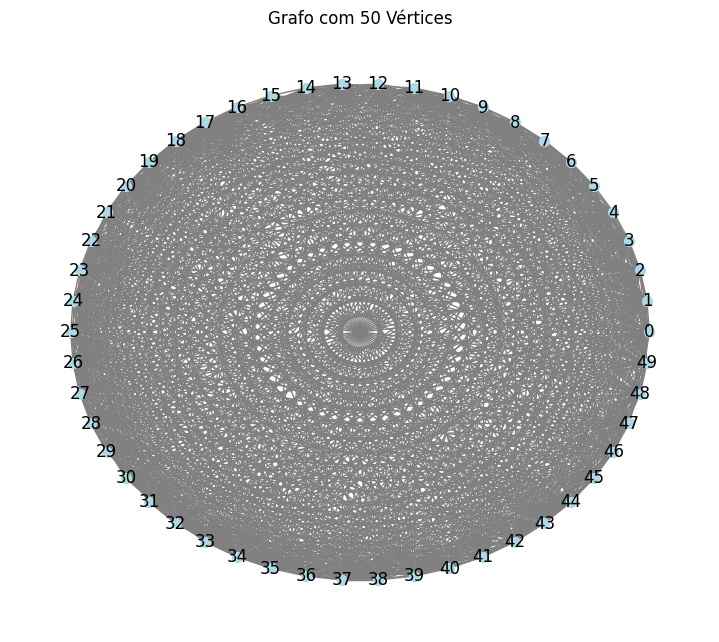

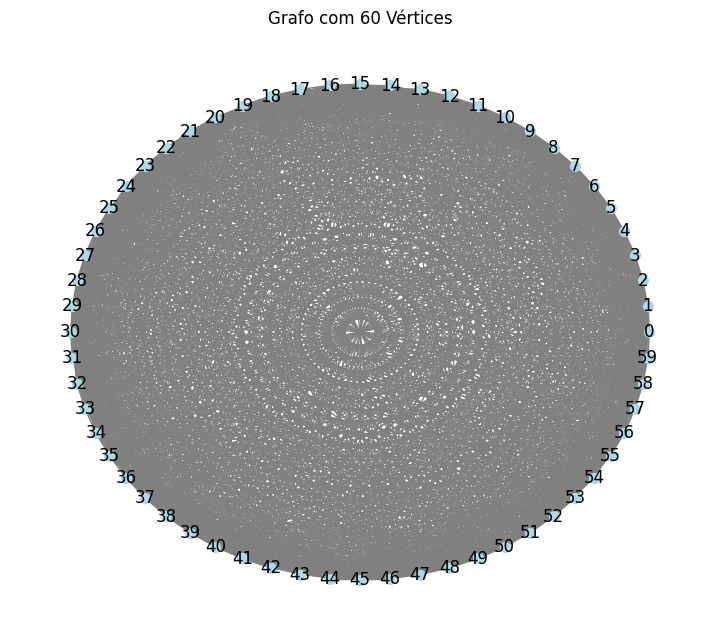

In [42]:
for a in range(0,5):
  mostraGrafos(listaGrafos[a])